# Keras를 활용한 심층 신경망 실습 - mnist 손글씨 숫자 분류

In [42]:
#!pip install tensoflow

In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

### 순차 심층 신경망 모델 구현
1. 6만개의 이미지로 이루어진 X_train을 심층 신경망 모델에 넣어서 y_train 데이터의 숫자로 인식하도록 학습
2. 노드의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법 설정
3. 학습을 마친 모델에 1만개의 이미지로 이루어진 X_test를 입력하여 정확도 측정

#### 데이터 준비: 분할, 차원변경, 정규화

In [1]:
# 데이터 파일 가져오기
import numpy as np

X_train_np = np.loadtxt('./skyggle_MNIST/X_train.txt')
y_train_np = np.loadtxt('./skyggle_MNIST/y_train.txt').astype(int)
X_test_np = np.loadtxt('./skyggle_MNIST/X_test.txt')

In [2]:
X_train_np.shape, y_train_np.shape,X_test_np.shape

((60000, 784), (60000,), (10000, 784))

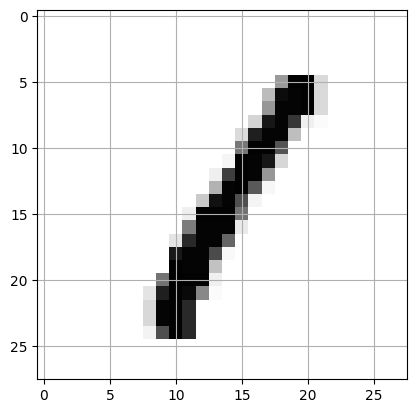

In [3]:
# 불러온 이미지 데이터를 시각화해보기
import matplotlib.pyplot as plt
plt.imshow(X_train_np[3].reshape(28,28), cmap='Greys'); #원래값을 "gray"
plt.grid()

In [4]:
y_train_np[:10].astype(int)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [5]:
# 타켓 분포 확인
import pandas as pd


pd.Series(y_train_np).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [6]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train_np,y_train_np,
                                               stratify = y_train_np,
                                               test_size=0.2,
                                               random_state=42)

In [7]:
X_train.shape

(48000, 784)

In [8]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

In [9]:
# y_train, y_val 원핫인코딩(카테고리화)
from tensorflow.keras.utils import to_categorical

y_train_encode = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

print(y_train[:10])
print(y_train_encode[:10])

[1 3 6 8 6 8 5 7 8 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 인공 신경망 모델 구성

In [10]:
# 1) 모델 및 레이어 구성
from keras.models import Sequential
from keras.layers import Flatten # input_shape이 2차원 이상인 경우 Flatten()을 사용해야 함
                                 # 본 실습에서는 input_shape(784, ) 1차원이므로 사용하지 않음.
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=20,activation='relu',input_shape=(784,)))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='softmax', name='sky'))

In [11]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 sky (Dense)                 (None, 10)                160       
                                                                 
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


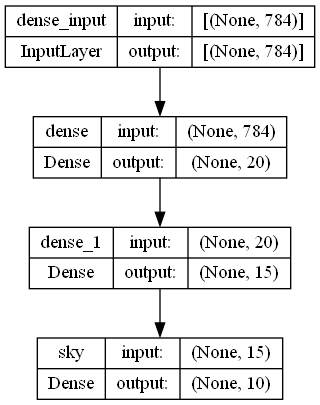

In [12]:
# 3) 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes= True, show_layer_names=True,to_file='MNIST.png')

#### 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [15]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

#### 모델 훈련

In [51]:
hist = model.fit(X_train, y_train_encode,
                 epochs=10,
                 validation_data=(X_val, y_val_encoded))

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.2734 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.2896 - val_accuracy: 0.9514
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.2782 - val_accuracy: 0.9521
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.2776 - val_accuracy: 0.9555
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.2811 - val_accuracy: 0.9525
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.3087 - val_accuracy: 0.9495
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9915 - val_loss: 0.3074 - val_accuracy:

In [52]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.028833,0.990479,0.273368,0.953167
1,0.028890,0.990396,0.289612,0.951417
2,0.025527,0.992042,0.278164,0.952083
3,0.026799,0.991083,0.277568,0.955500
4,0.027142,0.991229,0.281121,0.952500
5,0.026296,0.991625,0.308691,0.949500
6,0.024595,0.991521,0.307350,0.949083
7,0.025524,0.991750,0.293836,0.954750
8,0.025746,0.992125,0.291019,0.954250
9,0.021992,0.993104,0.294731,0.952583


#### 손실과 정확도 그래프: 모델 성능 평가

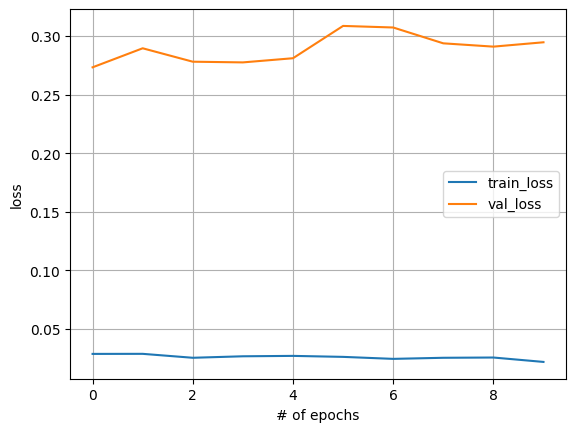

In [54]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()

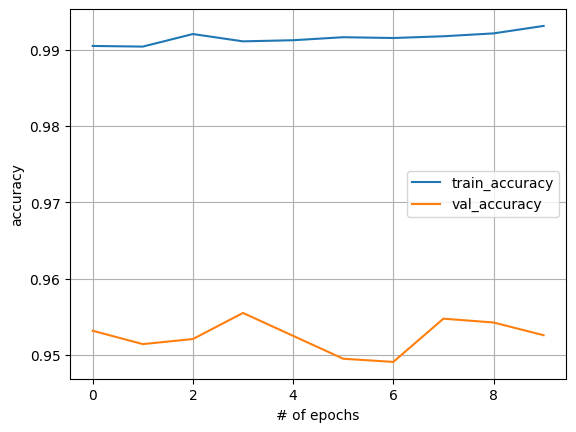

In [55]:
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

In [56]:
# 모델 성능 검증

model.evaluate(X_val,y_val_encoded)

375/375 [==============================] - 0s 840us/step - loss: 0.2947 - accuracy: 0.9526


[0.2947309911251068, 0.9525833129882812]

In [57]:
# 모델 예측
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)[:10]

375/375 [==============================] - 0s 665us/step


In [58]:
# 클래스 이름을 찾는 법

np.argmax(y_pred_proba,axis=-1)

array([7, 7, 3, 5, 6, 9, 6, 6, 7, 8], dtype=int64)

In [59]:
y_pred_proba = model.predict(X_test_np)

313/313 [==============================] - 0s 737us/step


In [60]:
sub = pd.read_csv("./skyggle_MNIST/submission.csv")

In [61]:
sub.label=np.argmax(y_pred_proba, axis=-1)
sub.to_csv('pred.csv' ,index=None)

* 모델 학습 결과 시각화

In [79]:
################################################################